In [ ]:
 # Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import keras
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA


In [ ]:
# Load files
train = pd.read_csv("/content/drive/MyDrive/digital-green-crop-yield-estimate-challenge20230912-4562-1bbmstk/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/digital-green-crop-yield-estimate-challenge20230912-4562-1bbmstk/Test.csv")
submission=pd.read_csv("/content/drive/MyDrive/digital-green-crop-yield-estimate-challenge20230912-4562-1bbmstk/SampleSubmission.csv")

In [ ]:
train["result"]=train["Yield"]/train['Acre']
train.loc[((train['District'] == 'Jamui') & (train['Block'] == 'Gurua')), 'District'] = 'Gaya'
test.loc[((test['District'] == 'Jamui') & (test['Block'] == 'Gurua')), 'District'] = 'Gaya'

In [ ]:
train[train['Yield']==0]

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,result


In [ ]:
train['Yield'].value_counts()

400     368
300     158
800     156
600     140
200     117
       ... 
892       1
1920      1
552       1
2070      1
653       1
Name: Yield, Length: 379, dtype: int64

In [ ]:
train['District'].value_counts()

Nalanda     1193
Jamui       1126
Vaishali     980
Gaya         571
Name: District, dtype: int64

In [ ]:
test['District'].value_counts()

Nalanda     404
Jamui       384
Vaishali    325
Gaya        177
Name: District, dtype: int64

In [ ]:
# train = train[train['Yield'] != 100]

In [ ]:
# / train['RcNursEstDate1'] = pd.to_datetime(train['RcNursEstDate'])
#  train['SeedingSowingTransplanting1'] = pd.to_datetime(train['SeedingSowingTransplanting'])
#  train['NurtoPlantingDays'] = (train['SeedingSowingTransplanting1'] - train['RcNursEstDate1']).dt.days
#  train.drop(['RcNursEstDate1'], axis=1, inplace=True)
#  train.drop(['SeedingSowingTransplanting1'], axis=1, inplace=True)

#  test['RcNursEstDate1'] = pd.to_datetime(test['RcNursEstDate'])
#  test['SeedingSowingTransplanting1'] = pd.to_datetime(test['SeedingSowingTransplanting'])
#  test['NurtoPlantingDays'] = (test['SeedingSowingTransplanting1'] - test['RcNursEstDate1']).dt.days
#  test.drop(['RcNursEstDate1'], axis=1, inplace=True)
#  test.drop(['SeedingSowingTransplanting1'], axis=1, inplace=True)

In [ ]:
# train['RcNursEstDate1'] = pd.to_datetime(train['RcNursEstDate'])
# train['Harv_date1'] = pd.to_datetime(train['Harv_date'])
# train['NurtoPlantingDays'] = (train['Harv_date1'] - train['RcNursEstDate1']).dt.days
# train.drop(['RcNursEstDate1'], axis=1, inplace=True)
# train.drop(['Harv_date1'], axis=1, inplace=True)

# test['RcNursEstDate1'] = pd.to_datetime(test['RcNursEstDate'])
# test['Harv_date1'] = pd.to_datetime(test['Harv_date'])
# test['NurtoPlantingDays'] = (test['Harv_date1'] - test['RcNursEstDate1']).dt.days
# test.drop(['RcNursEstDate1'], axis=1, inplace=True)
# test.drop(['Harv_date1'], axis=1, inplace=True)

In [ ]:
# train['1tdUreaperAcre'] = (train['1tdUrea'] / train['Acre'])
# test['1tdUreaperAcre'] = (test['1tdUrea'] / test['Acre'])
# train['GanauraperAcre'] = (train['Ganaura'] / train['Acre'])
# test['GanauraperAcre'] = (test['Ganaura'] / test['Acre'])

In [ ]:
train['class']=np.where(train['Yield']>1700,1,0)

In [ ]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

cat_cols = train.describe(include = 'O').columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])

In [ ]:
train3=train.fillna(0)
test3=test.fillna(0)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# train = imputer.fit_transform(train)
# train = pd.DataFrame(train, columns=train.columns)
# test = imputer.fit_transform(test)
# test = pd.DataFrame(test, columns=test.columns)

In [ ]:
# train3 = train3[train3['Yield'] != 100]


In [ ]:
# train['Harv_hand_rentperAcre'] = (train['Harv_hand_rent'] / train['Acre'])
# test['Harv_hand_rentperAcre'] = (test['Harv_hand_rent'] / test['Acre'])

In [ ]:
#  train3['RcNursEstDate1'] = pd.to_datetime(train3['RcNursEstDate'])
#  train3['SeedingSowingTransplanting1'] = pd.to_datetime(train3['SeedingSowingTransplanting'])
#  train3['NurtoPlantingDays'] = (train3['SeedingSowingTransplanting1'] - train3['RcNursEstDate1']).dt.days
#  train3.drop(['RcNursEstDate1'], axis=1, inplace=True)
#  train3.drop(['SeedingSowingTransplanting1'], axis=1, inplace=True)

#  test3['RcNursEstDate1'] = pd.to_datetime(test3['RcNursEstDate'])
#  test3['SeedingSowingTransplanting1'] = pd.to_datetime(test3['SeedingSowingTransplanting'])
#  test3['NurtoPlantingDays'] = (test3['SeedingSowingTransplanting1'] - test3['RcNursEstDate1']).dt.days
#  test3.drop(['RcNursEstDate1'], axis=1, inplace=True)
#  test3.drop(['SeedingSowingTransplanting1'], axis=1, inplace=True)

In [ ]:
columns = train3.columns
columns =  [col for col in columns if col not in ['Yield','class','result']]
features = columns
target = 'class'

X = train3[columns]
y = train3[target]
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# # Split the data into training and test sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

# # Create the LDA model
# lda = LinearDiscriminantAnalysis()

# # Fit the LDA model to the training data
# lda.fit(X, y)

# # # Predict the target variable for the test data
# # y_pred = lda.predict(X_test)

# # # Calculate the accuracy of the LDA model
# # accuracy = lda.score(X_test, y_test)

# # # Print the accuracy of the LDA model
# # print("Accuracy:", accuracy)
# # from sklearn.metrics import confusion_matrix
# # confusion_matrix(y_test,y_pred)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=40)

In [ ]:
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_val=scaler.fit_transform(X_val)
# test=scaler.fit_transform(test)

In [ ]:
X_train.shape

(3483, 42)

In [ ]:
# model = keras.Sequential([
#     layers.Dense(32, activation='relu'),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Define an early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(X, y, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_val, y_val)
# print(f'Test loss: {test_loss:.4f}')
# print(f'Test accuracy: {test_accuracy:.4f}')

In [ ]:
# # Define the ANN architecture
# model = keras.models.Sequential([
#     # keras.layers.Flatten(input_shape=(3483, 42)),
#     keras.layers.Dense(128, activation='relu'),
#     # keras.layers.Dense(10, activation='softmax')
# ])

# # Compile the ANN
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Implement early stopping
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# # Train the ANN
# model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Evaluate the ANN
# test_loss, test_accuracy = model.evaluate(X_val, y_val)
# print('Test accuracy:', test_accuracy)

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.model_selection import GridSearchCV
# lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'num_leaves': [31, 50, 100],
#     # Add other hyperparameters here
# }
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='f1', cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_lgbm = grid_search.best_estimator_
# best_lgbm.fit(X_train, y_train)
# y_pred = best_lgbm.predict(X_val)
# f1 = f1_score(y_val, y_pred)
# accuracy = accuracy_score(y_val, y_pred)
# print("Best F1 Score:", f1)
# print("Best Accuracy:", accuracy)

In [ ]:


model = lgb.LGBMClassifier()


model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 113, number of negative: 3370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 3483, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032443 -> initscore=-3.395280
[LightGBM] [Info] Start training from score -3.395280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

Text(0.5, 1.0, 'Feature Importance')

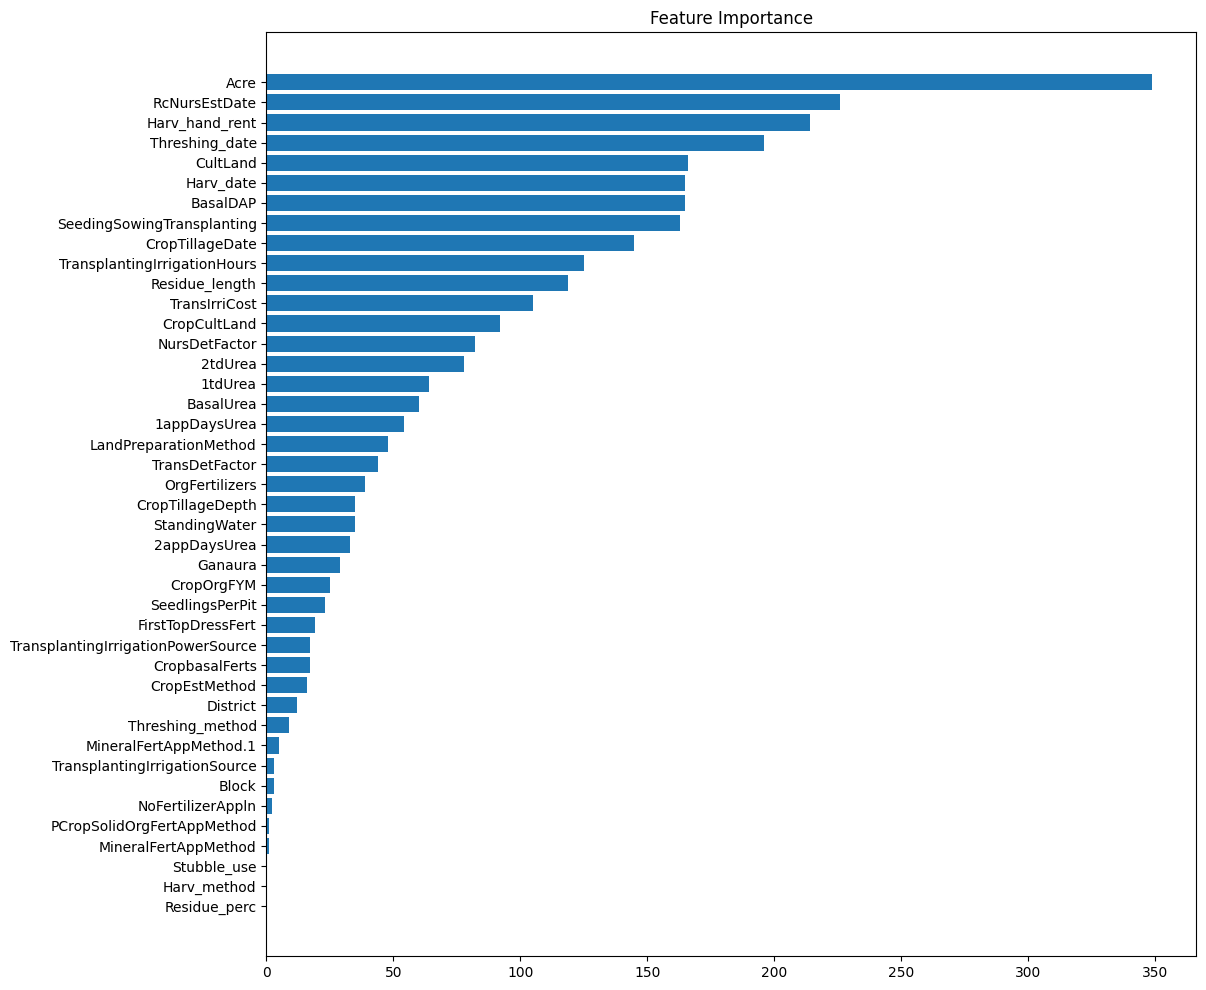

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
y_pred_val =model.predict(X_val)
# y_pred_val = (y_pred_val > 0.5).astype(int)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,y_pred_val)

array([[370,   1],
       [  6,  10]])

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy   :", accuracy)
precision = precision_score(y_val, y_pred_val)
print("Precision :", precision)
recall = recall_score(y_val, y_pred_val)
print("Recall    :", recall)
F1_score = f1_score(y_val, y_pred_val)
print("F1-score  :", F1_score)

Accuracy   : 1.0
Precision : 1.0
Recall    : 1.0
F1-score  : 1.0


In [ ]:
y_val.unique()

array([0, 1])

In [ ]:
test['class']=model.predict(test3[features])
# test['class'] = (test['class'] > 0.5).astype(int)

In [ ]:
 # test[test['class']==1]

In [ ]:
# test[test['class']==0]

In [ ]:
# train["RcNursEstDate1"] = label_encoder.inverse_transform(train['RcNursEstDate'])
# train["SeedingSowingTransplanting1"] = label_encoder.inverse_transform(train['SeedingSowingTransplanting'])

In [ ]:
# train.drop(['NurtoPlantingDays'], axis=1, inplace=True)
# test.drop(['NurtoPlantingDays'], axis=1, inplace=True)


In [ ]:
train1=train[train['class']==1]
test1=test[test['class']==1]
train2=train[train['class']==0]
test2=test[test['class']==0]


In [ ]:
# train1=train1.fillna(0)
# test1=test1.fillna(0)

In [ ]:
train1['1tdUreaperAcre'] = (train1['1tdUrea'] / train1['Acre'])
test1['1tdUreaperAcre'] = (test1['1tdUrea'] / test1['Acre'])
train1['GanauraperAcre'] = (train1['Ganaura'] / train1['Acre'])
test1['GanauraperAcre'] = (test1['Ganaura'] / test1['Acre'])
# train1['TransIrriCostperAcre'] = (train1['BasalDAP'] + train1['BasalUrea'])
# test1['TransIrriCostperAcre'] = (test1['BasalDAP'] + test1['BasalUrea'])
# train1['TransplantingIrrigationHoursperAcre'] = (train1['TransplantingIrrigationHours'] / train1['Acre'])
# test1['TransplantingIrrigationHoursperAcre'] = (test1['TransplantingIrrigationHours'] / test1['Acre'])
# train['NurtoPlantingDays'] = train['SeedingSowingTransplanting'] - train['RcNursEstDate']
# train1['HarvAcre'] = (train1['1tdUrea'] * train1['Acre']*train1['SeedlingsPerPit'])
# test1['HarvAcre'] = (test1['1tdUrea'] * test1['Acre']*test1['SeedlingsPerPit'])


<ipython-input-775-745f5463bb00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['1tdUreaperAcre'] = (train1['1tdUrea'] / train1['Acre'])
<ipython-input-775-745f5463bb00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['1tdUreaperAcre'] = (test1['1tdUrea'] / test1['Acre'])
<ipython-input-775-745f5463bb00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
# train1 = pd.get_dummies(train1, columns=['SeedlingsPerPit'])
# test1 = pd.get_dummies(test1, columns=['SeedlingsPerPit'])
# train1 = pd.get_dummies(train1, columns=['Ganaura'])
# test1 = pd.get_dummies(test1, columns=['Ganaura'])

In [ ]:
# train1['RcNursEstDate1'] = pd.to_datetime(train1['RcNursEstDate'])
# train1['Harv_date1'] = pd.to_datetime(train1['Harv_date'])
# train1['NurtoPlantingDays'] = (train1['Harv_date1'] - train1['RcNursEstDate1']).dt.days
# train1.drop(['RcNursEstDate1'], axis=1, inplace=True)
# train1.drop(['Harv_date1'], axis=1, inplace=True)

# test1['RcNursEstDate1'] = pd.to_datetime(test1['RcNursEstDate'])
# test1['Harv_date1'] = pd.to_datetime(test1['Harv_date'])
# test1['NurtoPlantingDays'] = (test1['Harv_date1'] - test1['RcNursEstDate1']).dt.days
# test1.drop(['RcNursEstDate1'], axis=1, inplace=True)
# test1.drop(['Harv_date1'], axis=1, inplace=True)

In [ ]:
# train1=train1.drop(['1tdUrea'], axis=1)
# train1=train1.drop(['TransIrriCost'], axis=1)
# train1=train1.drop(['1tdUrea'], axis=1)


In [ ]:
train1=train1.fillna(0)
test1=test1.fillna(0)

In [ ]:
train1["result"]=train1["Yield"]/train1['Acre']
# train1=train1[train1['result']>1700]
# train1['1tdUrea*BasalDAP'] = (train1['1tdUrea']*train1['BasalDAP'])
# test1['1tdUrea*BasalDAP'] = (test1['1tdUrea']*test1['BasalDAP'])
train1=train1.drop(['1tdUrea'], axis=1)

In [ ]:
# train1['RcNursEstDate1'] = pd.to_datetime(train1['RcNursEstDate'])
# train1['SeedingSowingTransplanting1'] = pd.to_datetime(train1['SeedingSowingTransplanting'])
# train1['NurtoPlantingDays'] = (train1['SeedingSowingTransplanting1'] - train1['RcNursEstDate1']).dt.days
# train1.drop(['RcNursEstDate1'], axis=1, inplace=True)
# train1.drop(['SeedingSowingTransplanting1'], axis=1, inplace=True)

# test1['RcNursEstDate1'] = pd.to_datetime(test1['RcNursEstDate'])
# test1['SeedingSowingTransplanting1'] = pd.to_datetime(test1['SeedingSowingTransplanting'])
# test1['NurtoPlantingDays'] = (test1['SeedingSowingTransplanting1'] - test1['RcNursEstDate1']).dt.days
# test1.drop(['RcNursEstDate1'], axis=1, inplace=True)
# test1.drop(['SeedingSowingTransplanting1'], axis=1, inplace=True)

In [ ]:
# train1['Yield'].value_counts()
train1[train1['result']>20000]

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,result,class,1tdUreaperAcre,GanauraperAcre
521,1,3,20,15,25,27,4,3,44,42,...,1,27,10,1,0.272727,6000,22000.0,1,33.0,18.333333
1618,2,7,30,30,15,12,6,3,15,14,...,0,22,10,1,0.250000,5300,21200.0,1,32.0,0.000000
2270,1,3,15,10,39,31,4,3,48,40,...,1,26,10,1,0.272727,6000,22000.0,1,22.0,14.666667


In [ ]:
# train1 = train1[train1['Yield'] !=3200]

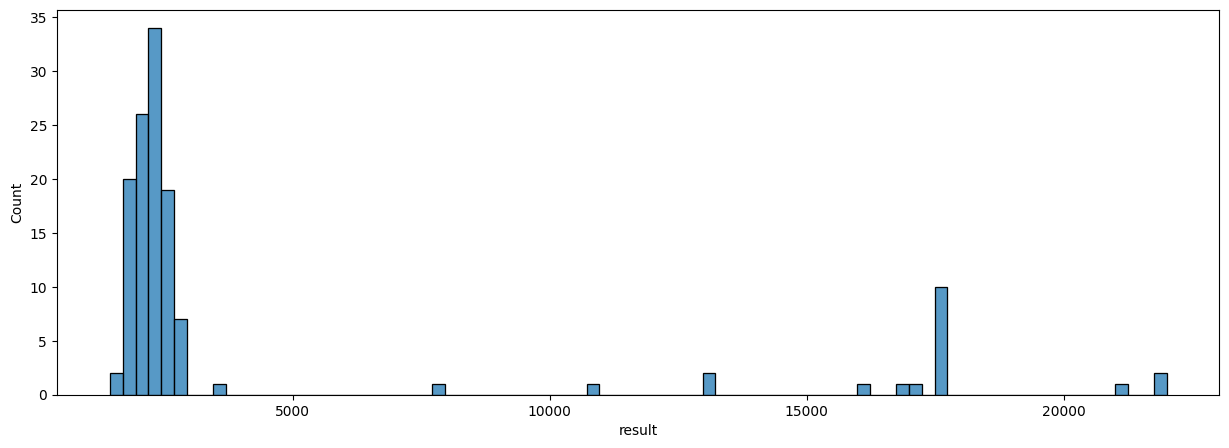

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(train1['result'])
plt.show()

In [ ]:
# train1=train1[train1['result']<20000]

In [ ]:
columns = train1.columns
columns =  [col for col in columns if col not in ['Yield','class','result']]
features = columns
target = 'Yield'

X = train1[features]
y = train1[target]
# pca = PCA(n_components=10)

# # Fit the PCA model to your data
# pca.fit(X)

# X= pca.transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
# X.fillna(X.mean())

In [ ]:
# lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, num_leaves=31)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'num_leaves': [31, 50, 100],
#     # Add other hyperparameters here
# }
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_lgbm = grid_search.best_estimator_
# best_lgbm.fit(X_train, y_train)
# y_pred = best_lgbm.predict(X_val)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# print("Best RMSE:", rmse)

In [ ]:
# # Define the deep learning model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu'),

#     tf.keras.layers.Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Define early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Make predictions on the validation set
# y_pred = model.predict(X_val)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# print(f'Root Mean Square Error (RMSE): {rmse:.4f}')

# # You can also visualize the training process using matplotlib
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [ ]:
# import tensorflow as tf

# train_features = tf.keras.utils.normalize(X_train, axis=-1)
# test_features = tf.keras.utils.normalize(X_val, axis=-1)


# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(128, activation='relu', input_shape=(train_features.shape[1],)),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(1, activation='linear')
# ])


# # Compile the neural network model
# model.compile(loss='mse', optimizer='adam')

# # Train the neural network model
# model.fit(train_features, y_train, epochs=100)

# # Evaluate the neural network model
# test_loss = model.evaluate(test_features, y_val)
# print('Test loss:', test_loss)

In [ ]:
# import tensorflow as tf

# # Load the dataset
# train_features = X
# train_targets = y

# # Convert the dataset to tensors
# # train_features = tf.convert_to_tensor(train_features)
# # train_targets = tf.convert_to_tensor(train_targets)

# # Split the dataset into training and test sets
# train_features, test_features, train_targets, test_targets = train_test_split(train_features, train_targets, test_size=0.25)

# # Scale the data
# train_features = tf.keras.utils.normalize(train_features, axis=-1)
# test_features = tf.keras.utils.normalize(test_features, axis=-1)

# # Design the neural network architecture
# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(128, activation='relu', input_shape=(train_features.shape[1],)),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(1, activation='linear')
# ])

# # Compile the neural network model
# model.compile(loss='mse', optimizer='adam')

# # Train the neural network model
# model.fit(train_features, train_targets, epochs=100)

# # Evaluate the neural network model
# test_loss = model.evaluate(test_features, test_targets)
# print('Test loss:', test_loss)

# # Make predictions on the test data
# predictions = model.predict(test_features)

# # Print the first few predictions
# print('Predictions:', predictions[:5])

In [ ]:

# from sklearn.neighbors import KNeighborsRegressor
# model= KNeighborsRegressor(n_neighbors=3)
# import lightgbm as lgb
model = lgb.LGBMClassifier()
# model = lgb.LGBMRegressor()
model.fit(X,y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier()

In [ ]:
y_pred_val = model.predict(X_val)
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_val, y_pred_val)
import math
rmse = math.sqrt(mse)
print("The difference between actual and predicted values", mse)
print("The difference between actual and predicted values", rmse)
# accuracy = accuracy_score(y_val, y_pred_val)
# print("Accuracy   :", accuracy)

The difference between actual and predicted values 0.0
The difference between actual and predicted values 0.0


Text(0.5, 1.0, 'Feature Importance')

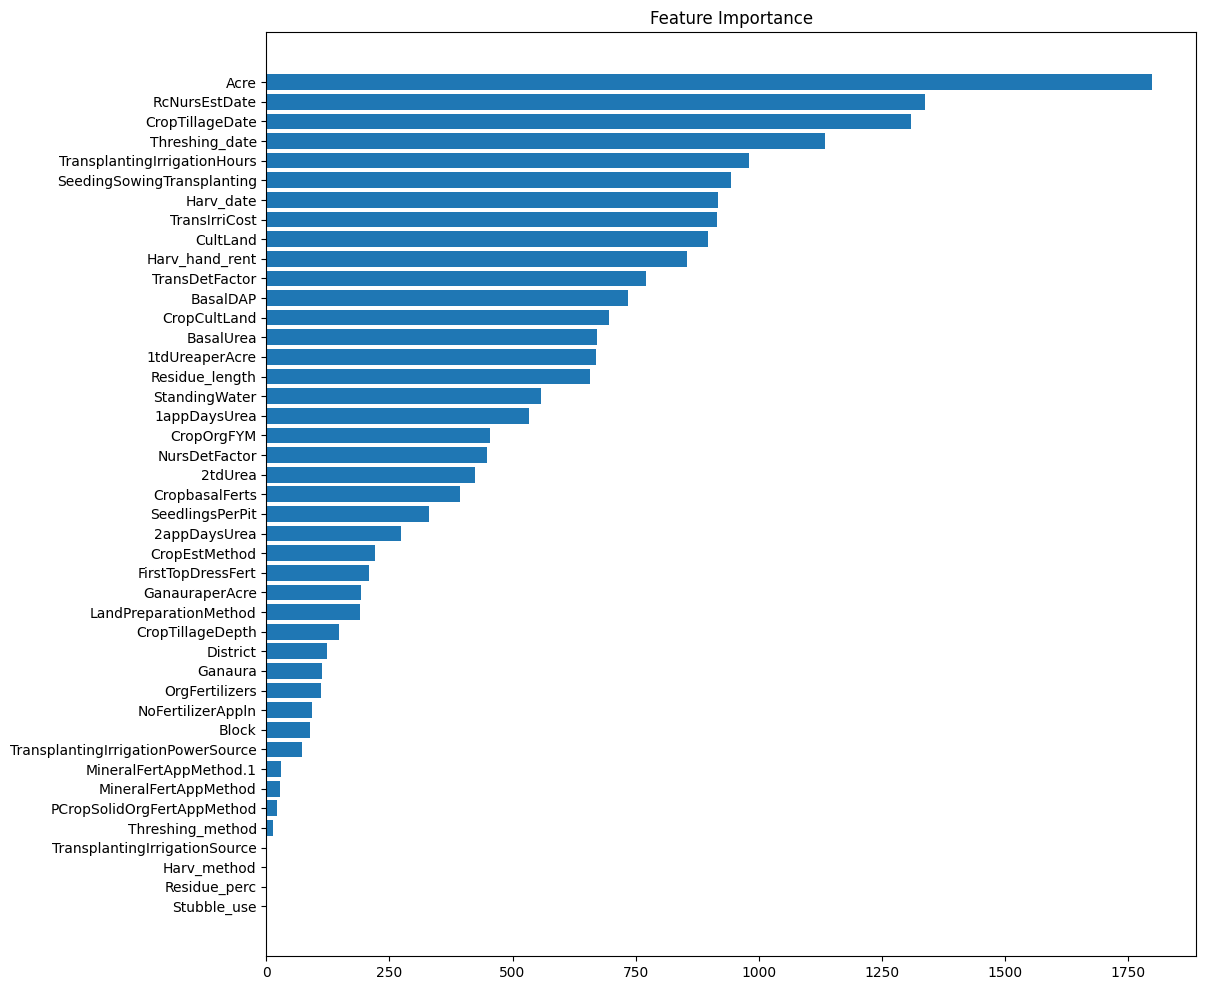

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
test1

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,class,1tdUreaperAcre,GanauraperAcre
17,1,4,52,30,6,56,4,3,3,31,...,1600.0,73,0,23,10,1,0.909091,1,23.100000,0.000000
61,3,1,24,24,6,25,6,3,26,11,...,2500.0,10,0,24,10,1,1.090909,1,0.000000,0.000000
68,1,4,23,17,6,54,4,2,32,28,...,1500.0,72,0,21,10,1,0.772727,1,22.000000,0.000000
77,3,1,20,20,6,40,6,2,18,25,...,3000.0,4,0,22,10,1,0.909091,1,33.000000,0.000000
96,3,1,20,20,6,41,6,3,17,14,...,2200.0,6,0,27,10,1,0.909091,1,46.200000,0.000000
209,2,8,120,30,28,48,3,3,4,20,...,0.0,36,1,29,40,1,0.937500,1,32.000000,0.000000
231,3,1,20,20,2,42,6,2,10,27,...,2300.0,15,0,26,10,1,0.909091,1,0.000000,0.000000
275,2,7,100,100,9,45,3,3,23,19,...,2500.0,92,1,25,10,1,0.781250,1,64.000000,0.000000
305,3,1,20,20,6,14,6,2,15,1,...,2000.0,19,0,27,10,1,0.909091,1,66.000000,0.000000
335,2,7,25,25,9,47,4,3,27,19,...,2000.0,60,1,24,10,1,0.781250,1,64.000000,0.000000


In [ ]:
test1[features]

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,1tdUreaperAcre,GanauraperAcre
17,1,4,52,30,6,56,4,3,3,31,...,62,1600.0,73,0,23,10,1,0.909091,23.100000,0.000000
61,3,1,24,24,6,25,6,3,26,11,...,13,2500.0,10,0,24,10,1,1.090909,0.000000,0.000000
68,1,4,23,17,6,54,4,2,32,28,...,62,1500.0,72,0,21,10,1,0.772727,22.000000,0.000000
77,3,1,20,20,6,40,6,2,18,25,...,1,3000.0,4,0,22,10,1,0.909091,33.000000,0.000000
96,3,1,20,20,6,41,6,3,17,14,...,8,2200.0,6,0,27,10,1,0.909091,46.200000,0.000000
209,2,8,120,30,28,48,3,3,4,20,...,47,0.0,36,1,29,40,1,0.937500,32.000000,0.000000
231,3,1,20,20,2,42,6,2,10,27,...,12,2300.0,15,0,26,10,1,0.909091,0.000000,0.000000
275,2,7,100,100,9,45,3,3,23,19,...,53,2500.0,92,1,25,10,1,0.781250,64.000000,0.000000
305,3,1,20,20,6,14,6,2,15,1,...,21,2000.0,19,0,27,10,1,0.909091,66.000000,0.000000
335,2,7,25,25,9,47,4,3,27,19,...,26,2000.0,60,1,24,10,1,0.781250,64.000000,0.000000


In [ ]:
test1['Yield']=model.predict(test1[features])
# test1['Yield']=test1['Yield'].round(-2)

In [ ]:
test1[test1['Yield']>5000]

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,class,1tdUreaperAcre,GanauraperAcre,Yield
373,1,3,15,15,26,37,4,3,44,39,...,91,1,26,10,1,0.454545,1,11.0,11.0,8000
663,1,3,15,15,26,29,4,3,44,39,...,98,1,26,10,1,0.454545,1,11.0,11.0,8000


In [ ]:
# train2['BasalDAPperAcre'] = (train2['2tdUrea'] / train2['Acre'])
# test2['BasalDAPperAcre'] = (test2['2tdUrea'] / test2['Acre'])
# train2['Harv_hand_rentperAcre'] = (train2['CultLand'] + train2['CropCultLand'])
# test2['Harv_hand_rentperAcre'] = (test2['CultLand'] + test2['CropCultLand'])

In [ ]:
# train2 = pd.get_dummies(train2, columns=['Harv_hand_rent'])
# test2 = pd.get_dummies(test2, columns=['Harv_hand_rent'])

In [ ]:
# train2=train2.fillna(train2.median())
# test2=test2.fillna(train2.median())
# train2=train2.drop(['Block'], axis=1)

In [ ]:
# train2=train2.drop(['SeedlingsPerPit'], axis=1)
# train2=train2.fillna(method='ffill')
# test2=test2.fillna(method='ffill')

In [ ]:
# train2['RcNursEstDate1'] = pd.to_datetime(train2['RcNursEstDate'])
# train2['Harv_date1'] = pd.to_datetime(train2['Harv_date'])
# train2['NurtoPlantingDays'] = (train2['Harv_date1'] - train2['RcNursEstDate1']).dt.days
# train2.drop(['RcNursEstDate1'], axis=1, inplace=True)
# train2.drop(['Harv_date1'], axis=1, inplace=True)

# test2['RcNursEstDate1'] = pd.to_datetime(test2['RcNursEstDate'])
# test2['Harv_date1'] = pd.to_datetime(test2['Harv_date'])
# test2['NurtoPlantingDays'] = (test2['Harv_date1'] - test2['RcNursEstDate1']).dt.days
# test2.drop(['RcNursEstDate1'], axis=1, inplace=True)
# test2.drop(['Harv_date1'], axis=1, inplace=True)

In [ ]:
train2['1tdUrea*BasalDAP'] = (train2['1tdUrea']*train2['BasalDAP'])
test2['1tdUrea*BasalDAP'] = (test2['1tdUrea']*test2['BasalDAP'])
# train2['2tdUrea*BasalDAP'] = (train2['2tdUrea']*train2['BasalDAP'])
# test2['2tdUrea*BasalDAP'] = (test2['2tdUrea']*test2['BasalDAP'])
# train2['TransIrriCost*cult'] = (train2['TransIrriCost']/train2['CropCultLand'])
# test2['TransIrriCost*cult'] = (test2['TransIrriCost']/test2['CropCultLand'])
# Remove duplicate rows
# train2= train2.drop_duplicates(subset=['Yield'])

<ipython-input-803-29f482273d33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['1tdUrea*BasalDAP'] = (train2['1tdUrea']*train2['BasalDAP'])
<ipython-input-803-29f482273d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['1tdUrea*BasalDAP'] = (test2['1tdUrea']*test2['BasalDAP'])


In [ ]:
train2["result"]=train2["Yield"]/train2['Acre']
train2[train2['result']>10000]

<ipython-input-804-9210785fe2dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2["result"]=train2["Yield"]/train2['Acre']


,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,result,class,1tdUrea*BasalDAP
2348,3,5,2,2,41,44,5,3,46,42,...,131,0,30,10,1,0.090909,1500,16500.0,0,20.0


In [ ]:
# train2 = train2[train2['Yield'] != 1500]
# train2 = train2[train2['Yield'] != 200]

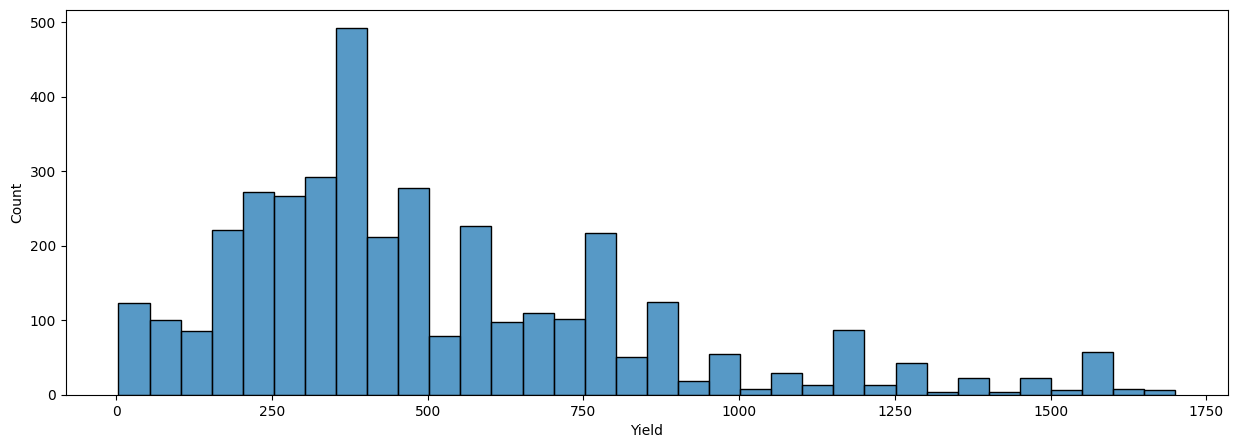

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(train2['Yield'])
plt.show()

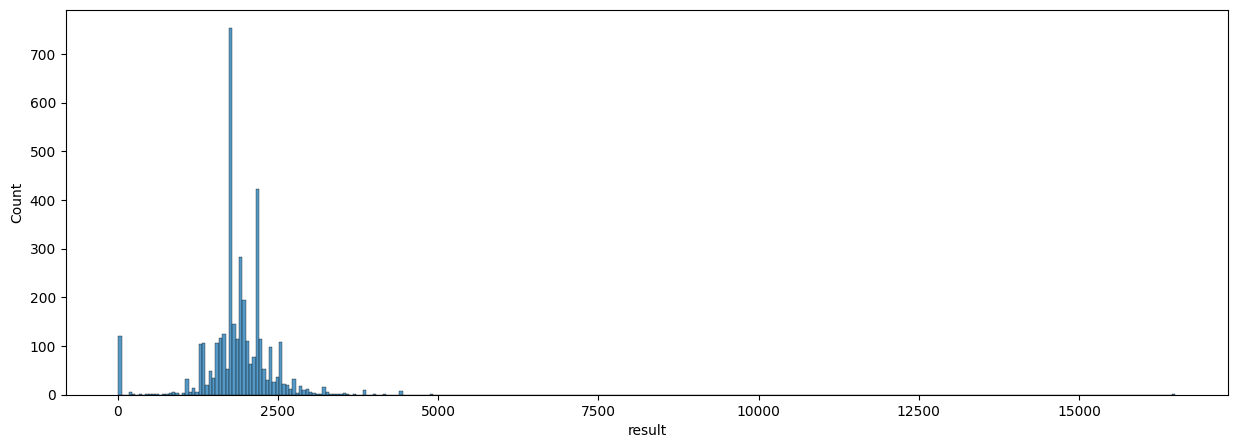

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(train2['result'])
plt.show()

In [ ]:
train2['result'].value_counts()

1760.000000    277
1760.000000    254
1920.000000    222
1280.000000     99
1600.000000     92
              ... 
2533.333333      1
1906.666667      1
2745.600000      1
48.000000        1
2089.600000      1
Name: result, Length: 530, dtype: int64

In [ ]:
# train2=train2['result']>1761

In [ ]:
train2['2tdUrea'].isnull().sum()

2613

In [ ]:
# train2.drop("SeedlingsPerPit",axis=1,inplace=True)
# train2.drop("MineralFertAppMethod.1",axis=1,inplace=True)

In [ ]:
# import tensorflow as tf
columns = train2.columns
columns =  [col for col in columns if col not in ['Yield','class','result']]
features = columns
target = 'Yield'


# Transform your data
# X= pca.transform(X)
# print(X)
X = train2[features]
y = train2[target]
# pca = PCA(n_components=10)

# # Fit the PCA model to your data
# pca.fit(X)
# X= pca.transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=40)

In [ ]:
X

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,1tdUrea*BasalDAP
0,2,6,45,40,18,49,5,3,26,20,...,1,54,NaN,41,1,30,40,1,0.312500,NaN
1,2,7,26,26,41,47,5,3,19,19,...,0,63,3.0,79,1,24,10,1,0.312500,300.0
2,0,2,10,10,18,29,6,3,19,43,...,0,80,480.0,96,1,30,10,1,0.148148,20.0
3,0,2,15,15,18,15,6,3,16,16,...,0,70,240.0,84,0,26,10,1,0.222222,30.0
4,2,6,60,60,24,48,4,3,20,19,...,1,68,NaN,57,1,24,40,1,0.468750,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,2,7,28,28,41,31,6,1,28,15,...,1,67,NaN,69,1,25,40,1,0.375000,216.0
3866,3,5,5,5,41,35,5,3,37,29,...,0,17,4.0,30,0,30,10,1,0.136364,36.0
3867,2,6,50,45,15,36,5,3,14,7,...,0,27,1200.0,24,0,25,10,1,0.375000,NaN
3868,1,4,20,20,15,41,3,3,27,23,...,0,47,100.0,65,0,25,10,1,0.227273,NaN


In [ ]:
test2.drop("class",axis=1,inplace=True)
# train2[train2['Yield']<1200]

<ipython-input-814-843a1e310d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.drop("class",axis=1,inplace=True)


In [ ]:
# test2.drop('class',axis=1, inplace=True)
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_val=scaler.transform(X_val)
# test2=scaler.transform(test2)

In [ ]:
# lgbm = lgb.LGBMRegressor(n_estimators=100,learning_rate=0.1, num_leaves=31)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'num_leaves': [31, 50, 100],
#     # Add other hyperparameters here
# }
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_lgbm = grid_search.best_estimator_
# best_lgbm.fit(X_train, y_train)
# y_pred = best_lgbm.predict(X_val)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# print("Best RMSE:", rmse)

In [ ]:
# # Define the deep learning model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Define early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Make predictions on the validation set
# y_pred = model.predict(X_val)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# print(f'Root Mean Square Error (RMSE): {rmse:.4f}')

# # You can also visualize the training process using matplotlib
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [ ]:
# !pip install catboost
# import catboost
# from catboost import CatBoostRegressor
# model = CatBoostRegressor(iterations=100,  # Number of boosting rounds
#                            learning_rate=0.1,  # Step size shrinkage
#                            depth=6,  # Depth of the trees
#                            loss_function='RMSE',  # Objective function
#                            random_seed=42)




# from sklearn.neighbors import KNeighborsRegressor
# model= KNeighborsRegressor(n_neighbors=3)
import lightgbm as lgb
# model = lgb.LGBMClassifier()
model = lgb.LGBMRegressor()
# import xgboost as xgb
# from xgboost import XGBRegressor
# model = XGBRegressor(
# #      objective='reg:squarederror',  # 'reg:squarederror' for regression
# #      n_estimators=100,  # Number of boosting rounds
# #      learning_rate=0.1,  # Step size
# #      max_depth=10  # Maximum depth of trees
# )
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import pandas as pd

# # Load your dataset (replace 'your_dataset.csv' with your actual file path)
# # Assuming your dataset has a column 'target' for regression


# # Separate features (X) and target variable (y)


# # Define the number of folds
# num_folds = 5

# # Create a k-fold cross-validation object
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=40)

# # Define LightGBM parameters (customize based on your needs)
# params = {
# #     'objective': 'regression',
# #     'metric': 'rmse',
# #     'boosting_type': 'gbdt',
# #     'num_leaves': 31,
# #     'learning_rate': 0.05,
# #     'feature_fraction': 0.9
#   }

# # Placeholder for storing RMSE values for each fold
# rmse_values = []
# test_preds_list = []

# # Iterate over each fold
# for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
#     print(f"Fold {fold + 1}:")

#     # Split the data into training and validation sets for this fold
#     X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
#     y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

#     # Create LightGBM datasets
#     train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
#     val_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)

#     # Train the LightGBM model with early stopping
#     model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, val_data])

#     # Make predictions on the validation set
#     y_pred = model.predict(X_val_fold, num_iteration=model.best_iteration)
#     test_preds = model.predict(test2)

#     # Calculate and print the RMSE for this fold
#     rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
#     print(f"RMSE: {rmse}\n")

#     # Store the RMSE value for later analysis
#     rmse_values.append(rmse)
#     test_preds_list.append(test_preds)

# # Print the average RMSE across all folds
# print(f"Average RMSE across all folds: {np.mean(rmse_values)}")
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1528
[LightGBM] [Info] Number of data points in the train set: 3366, number of used features: 42
[LightGBM] [Info] Start training from score 512.999703


LGBMRegressor()

In [ ]:
# test_preds_list

In [ ]:
# test_preds_mean = np.mean(test_preds_list, axis=0)

In [ ]:
# test_preds_mean

In [ ]:
# test2['Yield']=test_preds_mean

In [ ]:
test2

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,1tdUrea*BasalDAP
0,1,4,20,13,6,53,4,2,32,28,...,0,63,500.0,78,0,22,10,1,0.272727,48.0
1,1,4,25,25,6,53,5,3,37,32,...,0,43,150.0,70,1,28,10,1,0.227273,35.0
2,2,8,30,30,28,36,5,3,23,7,...,0,55,1200.0,55,1,28,10,1,0.281250,81.0
3,3,6,15,10,27,33,5,3,19,9,...,0,16,300.0,14,0,30,10,1,0.136364,135.0
4,2,8,30,10,28,50,3,3,23,21,...,1,51,NaN,40,1,26,40,1,0.312500,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,1,4,20,16,6,52,4,2,34,29,...,0,62,1200.0,73,0,23,10,1,0.500000,156.0
1286,3,6,25,14,28,36,5,3,38,24,...,0,16,450.0,10,0,28,10,1,0.181818,NaN
1287,3,1,10,3,6,35,6,2,17,8,...,0,28,600.0,32,0,29,10,1,0.136364,36.0
1288,1,3,10,10,7,51,4,3,17,25,...,0,56,90.0,109,0,29,10,1,0.227273,NaN


In [ ]:

y_pred_val = model.predict(X_val)
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_val, y_pred_val)
import math
rmse = math.sqrt(mse)
print("The difference between actual and predicted values", mse)
print("The difference between actual and predicted values", rmse)

The difference between actual and predicted values 12143.976886751676
The difference between actual and predicted values 110.19971364187693


Text(0.5, 1.0, 'Feature Importance')

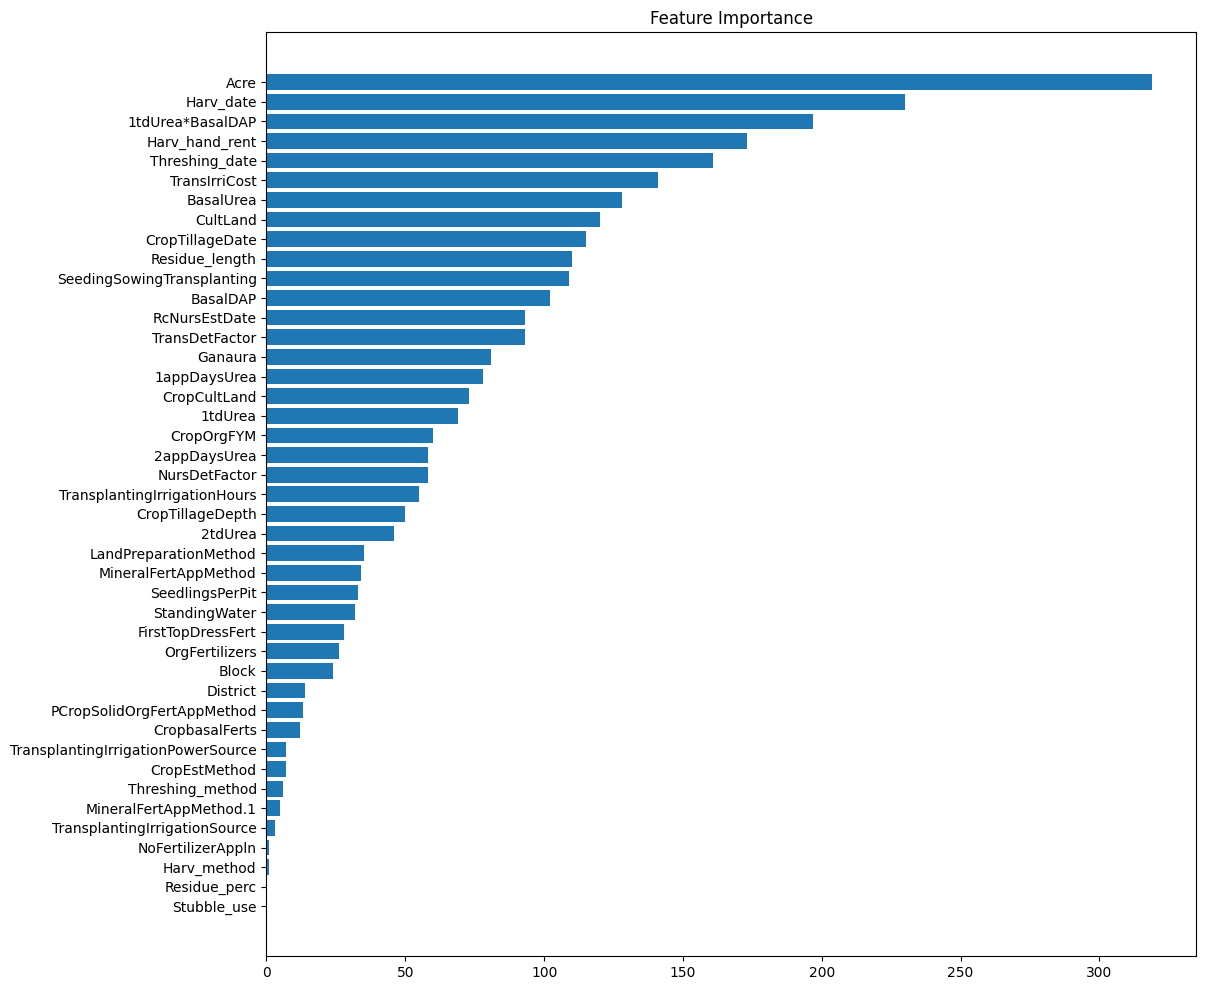

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
test2['Yield']=model.predict(test2[features])
# test2['Yield']=test2['Yield'].round(0)

<ipython-input-826-62cb9b69d04f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['Yield']=model.predict(test2[features])


In [ ]:
test2[test2["Yield"]<0]

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,1tdUrea*BasalDAP,Yield
13,3,6,16,6,9,11,5,3,13,17,...,25,400.0,15,0,30,10,1,0.090909,NaN,-13.477483
48,3,6,20,10,9,9,5,3,10,17,...,15,1000.0,16,0,30,10,1,0.227273,40.0,-2.967291
79,3,6,15,9,9,10,5,3,12,17,...,16,400.0,16,0,30,10,1,0.090909,8.0,-2.060090
102,3,6,10,5,9,9,5,3,11,17,...,22,4000.0,17,0,30,10,1,0.090909,16.0,-14.580010
123,3,6,15,10,9,9,5,3,12,17,...,15,400.0,17,0,30,10,1,0.090909,8.0,-3.260749
125,3,6,10,5,9,7,5,3,10,17,...,23,400.0,15,0,30,10,1,0.090909,8.0,-21.151317
133,3,6,10,5,9,10,5,3,11,17,...,20,400.0,15,0,30,10,1,0.090909,8.0,-24.007433
324,3,6,20,10,9,9,5,3,11,17,...,23,1000.0,15,0,30,10,1,0.227273,60.0,-21.968441
545,3,6,6,5,9,9,5,3,10,17,...,21,400.0,17,0,30,10,1,0.090909,16.0,-9.238764
967,3,6,10,5,9,9,5,3,13,17,...,22,400.0,14,0,30,10,1,0.090909,16.0,-15.726140


In [ ]:
test = pd.concat([test1,test2], axis=0)
test =test.sort_index(ascending=True)

In [ ]:
submission['Yield']=test['Yield']

In [ ]:
submission

,ID,Yield
0,ID_F9XXEXN2ADR2,622.087509
1,ID_SO3VW2X4QO93,405.158031
2,ID_UKUQ7JM8E894,537.021821
3,ID_QUISMWEZR2H4,284.486951
4,ID_25JGI455VKCZ,570.345223
...,...,...
1285,ID_6MMECMX3B728,1121.921016
1286,ID_GZ9YGWCLLMKN,413.797660
1287,ID_01YVA2LJVYBR,241.579686
1288,ID_YQRL2IOUU4SZ,373.044193


In [ ]:
submission[submission['Yield']<0]

,ID,Yield
13,ID_SCAOUCCTJ75Z,-13.477483
48,ID_4P7NKCB6LMJ5,-2.967291
79,ID_PVQOEEDTISZ0,-2.060090
102,ID_UFPM6MLG1BJK,-14.580010
123,ID_D20Z6VEJBE6K,-3.260749
125,ID_DJBLGDPMS85M,-21.151317
133,ID_OFSHZ2KZ1LQ4,-24.007433
324,ID_IYKX7HR08L6A,-21.968441
545,ID_YV25FQOXZ8MV,-9.238764
967,ID_WJSH3NU9GIQB,-15.726140


In [ ]:
submission['Yield'] = submission['Yield'].clip(lower=4)

In [ ]:
submission.to_csv("/content/s96.csv",index=False)